# ValueInvestor 

### Background:
We are a portfolio investment company and we make investments in the emerging markets around the world. Our company profits by investing in profitable companies, buying, holding and selling company stocks based on value investing principles.

Our goal is to establish a robust intelligent system to aid our value investing efforts using stock market data. We make investment decisions and based on intrinsic value of companies and do not trade on the basis of daily market volatility. Our profit realization strategy typically involves weekly, monthly and quarterly performance of stocks we buy or hold.


### Data Description:

You are given a set of portfolio companies trading data from emerging markets including 2020 Q1-Q2-Q3-Q4 2021 Q1 stock prices. Each company stock is provided in different sheets. Each market's operating days varies based on the country of the company and the market the stocks are exchanged. Use only 2020 data and predict with 2021 Q1 data.


Download Data:

https://docs.google.com/spreadsheets/d/1MiunF_O8eNWIcfaOA4PVm668RN7FgLNA0a6U4LWf5Bk/edit?usp=sharing


### Goal(s):

Predict stock price valuations on a daily, weekly and monthly basis. Recommend BUY, HOLD, SELL decisions. Maximize capital returns, minimize losses. Ideally a loss should never happen. Minimize HOLD period.

### Success Metrics

Evaluate on the basis of capital returns. Use Bollinger Bands to measure your systems effectiveness.

# Imports


In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import time
import math
%matplotlib inline

import warnings

warnings.filterwarnings('ignore', category=FutureWarning)

import plotly.graph_objects as go

import bt
import talib



from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, classification_report


# Data 

In [2]:
dict_stocks = pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name= None, parse_dates = ['Date'])
sber_rus = pd.DataFrame(dict_stocks['Russia - Sberbank Rossii PAO (S'])
kchol_tur = pd.DataFrame(dict_stocks['Turkey - Koc Holding AS (KCHOL)'])
mnhd_egy = pd.DataFrame(dict_stocks['Egypt - Medinet Nasr Housing (M'])
beef3_brz = pd.DataFrame(dict_stocks['Brazil - Minerva SABrazil (BEEF'])
pamp_arg = pd.DataFrame(dict_stocks['Argentina - Pampa Energia SA (P'])
ccb_col = pd.DataFrame(dict_stocks['Colombia - Cementos Argos SA (C'])
impj_sa = pd.DataFrame(dict_stocks['South Africa - Impala Platinum '])
_001230_sk= pd.DataFrame(dict_stocks['South Korea - Dongkuk Steel Mil'])
df_list = [sber_rus, kchol_tur, mnhd_egy, beef3_brz, pamp_arg, ccb_col, impj_sa, _001230_sk]

# SBER

In [3]:
sber_rus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      312 non-null    object 
 1   Price     312 non-null    object 
 2   Open      312 non-null    object 
 3   High      312 non-null    object 
 4   Low       312 non-null    object 
 5   Vol.      311 non-null    object 
 6   Change %  311 non-null    float64
dtypes: float64(1), object(6)
memory usage: 17.2+ KB


In [4]:
sber_rus.tail()

Date           Price                Open             High  \
307  2020-01-09 00:00:00          257.99               259.4           261.76   
308  2020-01-08 00:00:00          259.15              253.57           259.15   
309  2020-01-06 00:00:00           253.9              254.75           254.84   
310  2020-01-03 00:00:00             255              255.99           258.19   
311      Highest: 296.07  Lowest: 172.15  Difference: 123.92  Average: 234.52   

                 Low    Vol.  Change %  
307           257.01  38.33M   -0.0045  
308           253.03  40.82M    0.0207  
309            251.4  22.35M   -0.0043  
310            253.7  35.85M    0.0010  
311  Change %: 14.24     NaN       NaN

In [5]:
sber_rus

Date           Price                Open             High  \
0    2021-03-31 00:00:00          291.02                 294           294.42   
1    2021-03-30 00:00:00          293.25              294.86           295.72   
2    2021-03-29 00:00:00           293.3              289.72           294.09   
3    2021-03-26 00:00:00          291.22              288.63           292.75   
4    2021-03-25 00:00:00          286.66               286.5           287.03   
..                   ...             ...                 ...              ...   
307  2020-01-09 00:00:00          257.99               259.4           261.76   
308  2020-01-08 00:00:00          259.15              253.57           259.15   
309  2020-01-06 00:00:00           253.9              254.75           254.84   
310  2020-01-03 00:00:00             255              255.99           258.19   
311      Highest: 296.07  Lowest: 172.15  Difference: 123.92  Average: 234.52   

                 Low    Vol.  Change %  
0             290.26  47.00M   -0.0076  
1              291.5  38.81M   -0.0002  
2             289.26  43.68M    0.0071  
3             288.32  56.07M    0.0159  
4             283.85  35.22M    0.0030  
..               ...     ...       ...  
307           257.01  38.33M   -0.0045  
308           253.03  40.82M    0.0207  
309            251.4  22.35M   -0.0043  
310            253.7  35.85M    0.0010  
311  Change %: 14.24     NaN       NaN  

[312 rows x 7 columns]

The last row needs to be dropped as it seems to be providing summary statistics. 

In [6]:
sber_rus.drop(sber_rus.tail(1).index, inplace=True)

In [7]:
sber_rus.tail()

Date   Price    Open    High     Low    Vol.  Change %
306  2020-01-10 00:00:00  258.19  257.86  259.25  256.88  18.85M    0.0008
307  2020-01-09 00:00:00  257.99   259.4  261.76  257.01  38.33M   -0.0045
308  2020-01-08 00:00:00  259.15  253.57  259.15  253.03  40.82M    0.0207
309  2020-01-06 00:00:00   253.9  254.75  254.84   251.4  22.35M   -0.0043
310  2020-01-03 00:00:00     255  255.99  258.19   253.7  35.85M    0.0010

In [8]:
sber_rus['Date'] = pd.to_datetime(sber_rus.Date)

In [9]:
sber_rus['Vol.'].str[-1].unique().sum()

'M'

In [10]:
#remove the hyphen
def strip_hyphen(x):
    if isinstance(x, str):
        return x.replace('-', '0')
    else: 
        return x
sber_rus['Vol.'] = sber_rus['Vol.'].map(strip_hyphen)

In [11]:
for i in range(len(sber_rus)):
    if sber_rus['Vol.'][i][-1]=='M':
        sber_rus['Vol.'][i] = float(sber_rus['Vol.'][i].replace('M', ''))*1000000

In [12]:
sber_rus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      311 non-null    datetime64[ns]
 1   Price     311 non-null    object        
 2   Open      311 non-null    object        
 3   High      311 non-null    object        
 4   Low       311 non-null    object        
 5   Vol.      311 non-null    object        
 6   Change %  311 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 17.1+ KB


In [13]:
sber_rus[["Price", "Open", "High", "Low", "Change %", 'Vol.']] = sber_rus[["Price", "Open", "High", "Low", "Change %", 'Vol.']].apply(pd.to_numeric)

In [14]:
sber_rus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      311 non-null    datetime64[ns]
 1   Price     311 non-null    float64       
 2   Open      311 non-null    float64       
 3   High      311 non-null    float64       
 4   Low       311 non-null    float64       
 5   Vol.      311 non-null    float64       
 6   Change %  311 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 17.1 KB


In [15]:
sber_rus.head()

Date   Price    Open    High     Low        Vol.  Change %
0 2021-03-31  291.02  294.00  294.42  290.26  47000000.0   -0.0076
1 2021-03-30  293.25  294.86  295.72  291.50  38810000.0   -0.0002
2 2021-03-29  293.30  289.72  294.09  289.26  43680000.0    0.0071
3 2021-03-26  291.22  288.63  292.75  288.32  56070000.0    0.0159
4 2021-03-25  286.66  286.50  287.03  283.85  35220000.0    0.0030

In [16]:
sber_rus.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')

## SMA

In [17]:
df = sber_rus

In [18]:
# Filter data for 2020
df_2020 = df[df['Date'].dt.year == 2020]

# Calculate SMAs for 2020 data
df_2020['SMA_daily'] = df_2020['Price'].rolling(window=1).mean()  # Daily SMA
df_2020['SMA_weekly'] = df_2020['Price'].rolling(window=5).mean()  # Weekly SMA
df_2020['SMA_monthly'] = df_2020['Price'].rolling(window=22).mean()  # Monthly SMA

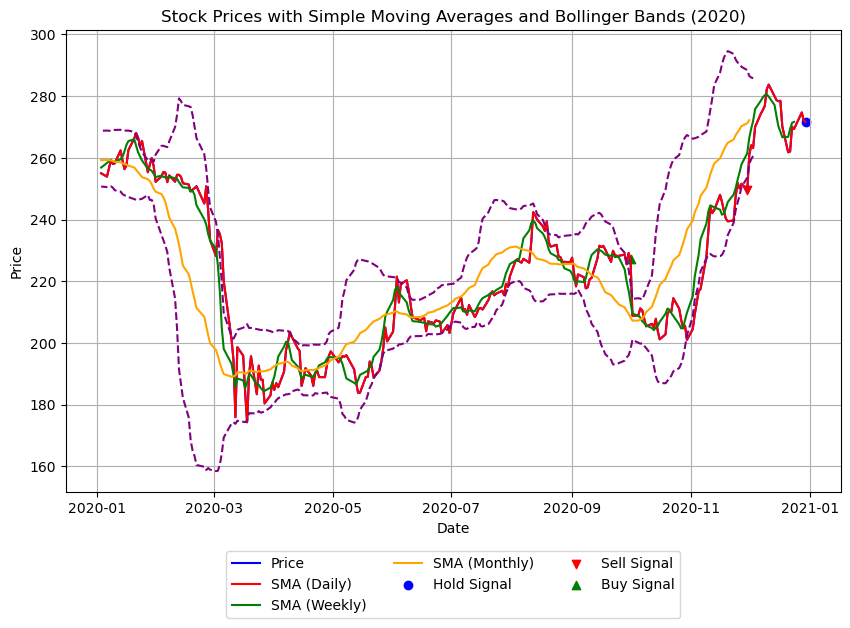

In [19]:
# Calculate Bollinger Bands for 2020 data
window_size = 20
df_2020['Rolling_mean'] = df_2020['Price'].rolling(window=window_size).mean()
df_2020['Rolling_std'] = df_2020['Price'].rolling(window=window_size).std()
df_2020['Upper_band'] = df_2020['Rolling_mean'] + 2 * df_2020['Rolling_std']
df_2020['Lower_band'] = df_2020['Rolling_mean'] - 2 * df_2020['Rolling_std']

# Plot SMAs and Bollinger Bands for 2020 data
plt.figure(figsize=(10, 6))
plt.plot(df_2020['Date'], df_2020['Price'], label='Price', color='blue')
plt.plot(df_2020['Date'], df_2020['SMA_daily'], label='SMA (Daily)', color='red')
plt.plot(df_2020['Date'], df_2020['SMA_weekly'], label='SMA (Weekly)', color='green')
plt.plot(df_2020['Date'], df_2020['SMA_monthly'], label='SMA (Monthly)', color='orange')
plt.plot(df_2020['Date'], df_2020['Upper_band'], color='purple', linestyle='--')
plt.plot(df_2020['Date'], df_2020['Lower_band'], color='purple', linestyle='--');

# Add buy, sell, and hold signals
buy_signal_shown = False
sell_signal_shown = False
hold_signal_shown = False
for i in range(len(df_2020)):
    if df_2020['Price'].iloc[i] > df_2020['Upper_band'].iloc[i] and not buy_signal_shown:
        plt.scatter(df_2020['Date'].iloc[i], df_2020['Price'].iloc[i], color='green', marker='^', label='Buy Signal')
        buy_signal_shown = True
    elif df_2020['Price'].iloc[i] < df_2020['Lower_band'].iloc[i] and not sell_signal_shown:
        plt.scatter(df_2020['Date'].iloc[i], df_2020['Price'].iloc[i], color='red', marker='v', label='Sell Signal')
        sell_signal_shown = True
    elif not hold_signal_shown:
        plt.scatter(df_2020['Date'].iloc[i], df_2020['Price'].iloc[i], color='blue', marker='o', label='Hold Signal')
        hold_signal_shown = True

plt.title('Stock Prices with Simple Moving Averages and Bollinger Bands (2020)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='center', bbox_to_anchor=(0.5, -0.2), ncol=3)
plt.grid(True)
plt.show()


In [20]:
# Filter data for 2021
df_2021 = df[df['Date'].dt.year == 2021]

# Now, for prediction, we assume you have 2021 data in df_2021

# Generate recommendations for 2021 data using SMAs and Bollinger Bands calculated from 2020 data
recommendations_2021 = []
for i in range(len(df_2021)):
    if df_2021['Price'].iloc[i] > df_2020['Upper_band'].iloc[-1]:
        recommendations_2021.append('SELL')
    elif df_2021['Price'].iloc[i] < df_2020['Lower_band'].iloc[-1]:
        recommendations_2021.append('BUY')
    else:
        recommendations_2021.append('HOLD')

In [21]:
#Define true labels based on recommendations for 2021 data
true_labels_2021 = []
buy_prices = []
sell_prices = []
for i in range(len(df_2021)):
    if df_2021['Price'].iloc[i] > df_2020['Upper_band'].iloc[-1]:
        true_labels_2021.append('SELL')
        buy_prices.append(df_2021['Price'].iloc[i])
    elif df_2021['Price'].iloc[i] < df_2020['Lower_band'].iloc[-1]:
        true_labels_2021.append('BUY')
        sell_prices.append(df_2021['Price'].iloc[i])
    else:
        true_labels_2021.append('HOLD')

# Evaluate predictions for 2021 data
conf_matrix_2021 = confusion_matrix(true_labels_2021, recommendations_2021)
classification_report_2021 = classification_report(true_labels_2021, recommendations_2021)

# Count correct decisions for each recommendation
correct_buy = sum(price < buy_prices[i + 1] for i, price in enumerate(buy_prices[:-1]))
correct_sell = sum(price > sell_prices[i + 1] for i, price in enumerate(sell_prices[:-1]))
correct_hold = true_labels_2021.count('HOLD')

# Print or store the results
print("2021 Evaluation:")
print("Confusion Matrix:")
print(conf_matrix_2021)
print("Classification Report:")
print(classification_report_2021)
print("Number of Correct Decisions:")
print("Buy:", correct_buy)
print("Sell:", correct_sell)
print("Hold:", correct_hold)

# Initialize lists to store buy and sell signals
buy_dates = []
buy_prices = []
sell_dates = []
sell_prices = []

# Iterate through the 2021 data
for i in range(len(df_2021)):
    if recommendations_2021[i] == 'BUY':
        # If the recommendation is to buy, append the date and price to the buy lists
        buy_dates.append(df_2021['Date'].iloc[i])
        buy_prices.append(df_2021['Price'].iloc[i])
    elif recommendations_2021[i] == 'SELL':
        # If the recommendation is to sell, append the date and price to the sell lists
        sell_dates.append(df_2021['Date'].iloc[i])
        sell_prices.append(df_2021['Price'].iloc[i])

# Print the number of buy and sell signals
print("Number of Buy Signals:", len(buy_dates))
print("Number of Sell Signals:", len(sell_dates))


2021 Evaluation:
Confusion Matrix:
[[12  0]
 [ 0 49]]
Classification Report:
              precision    recall  f1-score   support

        HOLD       1.00      1.00      1.00        12
        SELL       1.00      1.00      1.00        49

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61

Number of Correct Decisions:
Buy: 22
Sell: 0
Hold: 12
Number of Buy Signals: 0
Number of Sell Signals: 49


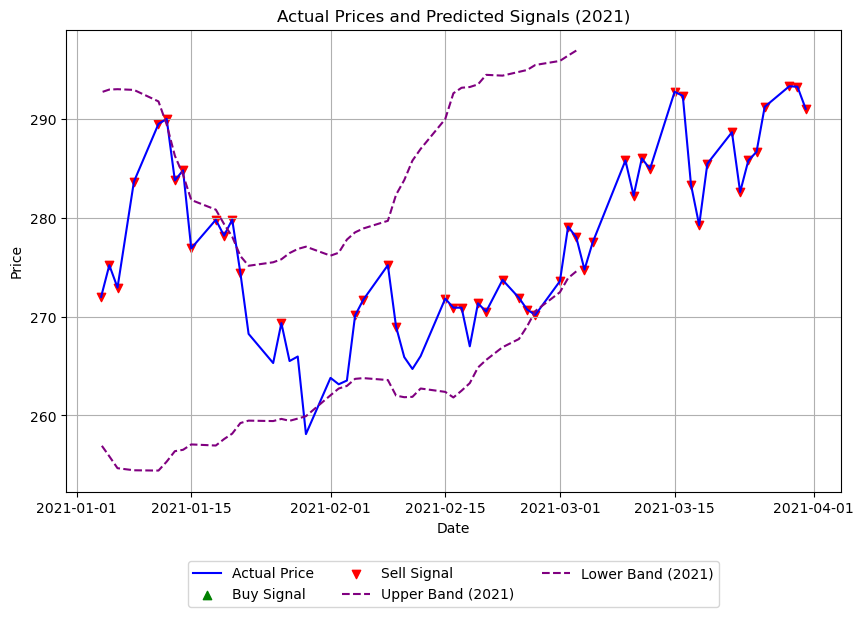

In [22]:
# Calculate Bollinger Bands for 2021 data
window_size_2021 = 20
df_2021['Rolling_mean'] = df_2021['Price'].rolling(window=window_size_2021).mean()
df_2021['Rolling_std'] = df_2021['Price'].rolling(window=window_size_2021).std()
df_2021['Upper_band'] = df_2021['Rolling_mean'] + 2 * df_2021['Rolling_std']
df_2021['Lower_band'] = df_2021['Rolling_mean'] - 2 * df_2021['Rolling_std']

# Plot actual prices and predicted signals for 2021
plt.figure(figsize=(10, 6))
plt.plot(df_2021['Date'], df_2021['Price'], label='Actual Price', color='blue')
plt.scatter(buy_dates, buy_prices, color='green', marker='^', label='Buy Signal')
plt.scatter(sell_dates, sell_prices, color='red', marker='v', label='Sell Signal')
plt.plot(df_2021['Date'], df_2021['Upper_band'], color='purple', linestyle='--', label='Upper Band (2021)')
plt.plot(df_2021['Date'], df_2021['Lower_band'], color='purple', linestyle='--', label='Lower Band (2021)')

plt.title('Actual Prices and Predicted Signals (2021)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='center', bbox_to_anchor=(0.5, -0.2), ncol=3)
plt.grid(True)
plt.show()


# ARIMA

In [23]:
df = sber_rus

In [24]:
# Define function to check for stationarity using ADF test
def check_stationarity(data):
    result = adfuller(data)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print("Null Hypothesis: The series is non-stationary (contains a unit root)")
    print("Alternate Hypothesis: The series is stationary (does not contain a unit root)")
    if result[1] > 0.05:
        print("Conclusion: Fail to reject the null hypothesis. The series is likely non-stationary.")
        return False
    else:
        print("Conclusion: Reject the null hypothesis. The series is likely stationary.")
        return True

## Daily

In [25]:
# Filter data for 2020
df_2020 = df[df['Date'].dt.year == 2020]
df_2020['Date'] = pd.to_datetime(df_2020['Date'])
df_2020.set_index('Date', inplace=True)

In [26]:
# Check stationarity of the original data
print("Checking stationarity of original data:")
stationary = check_stationarity(df_2020['Price'])
print()

# If not stationary, apply differencing to stationarize the data
if not stationary:
    df_2020['Price_diff'] = df_2020['Price'].diff()  # Calculate differences
    df_2020 = df_2020.dropna()  # Drop NaN resulting from differencing
    print("Checking stationarity after differencing:")
    stationary = check_stationarity(df_2020['Price_diff'])
    print()

Checking stationarity of original data:
ADF Statistic: -2.0096925956497476
p-value: 0.28233947152054056
Null Hypothesis: The series is non-stationary (contains a unit root)
Alternate Hypothesis: The series is stationary (does not contain a unit root)
Conclusion: Fail to reject the null hypothesis. The series is likely non-stationary.

Checking stationarity after differencing:
ADF Statistic: -5.145692470223533
p-value: 1.1337424281663171e-05
Null Hypothesis: The series is non-stationary (contains a unit root)
Alternate Hypothesis: The series is stationary (does not contain a unit root)
Conclusion: Reject the null hypothesis. The series is likely stationary.



In [27]:
# Convert index to datetime and set frequency
df_2020.index = pd.to_datetime(df_2020.index)
df_2020 = df_2020.asfreq('D') 


df_2020 = df_2020.sort_index()

# Fit ARIMA model
if stationary:
    model = ARIMA(df_2020['Price'], order=(5,1,0))
else:
    model = ARIMA(df_2020['Price_diff'], order=(5,0,0))  # Assuming we're using first-order differencing
model_fit = model.fit()


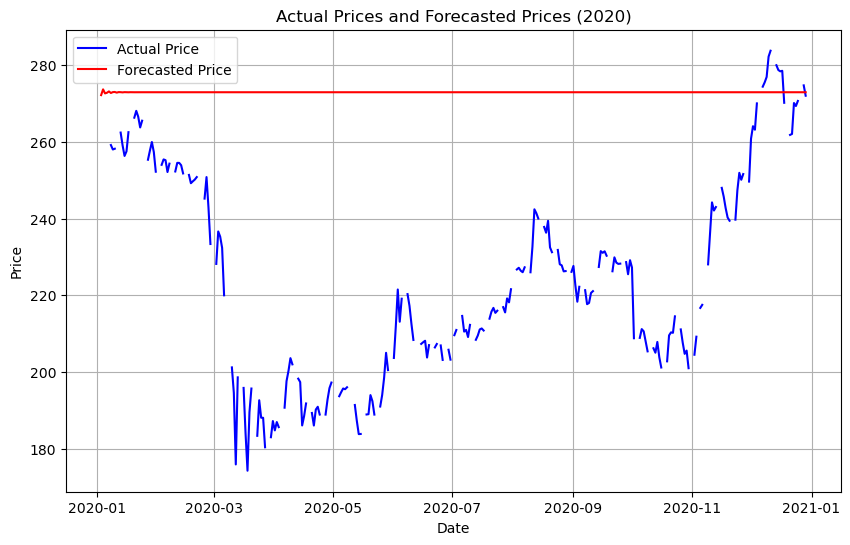

In [28]:
# Forecast future prices for 2020
forecast_2020 = model_fit.forecast(steps=len(df_2020))

# Plot actual prices and forecasted prices for 2020
plt.figure(figsize=(10, 6))
plt.plot(df_2020.index, df_2020['Price'], label='Actual Price', color='blue')
plt.plot(df_2020.index, forecast_2020, label='Forecasted Price', color='red')

plt.title('Actual Prices and Forecasted Prices (2020)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


In [29]:
# Filter data for 2021
df_2021 = df[df['Date'].dt.year == 2021]

# Forecast future prices for 2021
forecast_2021 = model_fit.forecast(steps=len(df_2021))

# Generate recommendations for 2021 data
recommendations_2021 = ['BUY' if forecast > df_2021['Price'].iloc[i] else 'SELL' if forecast < df_2021['Price'].iloc[i] else 'HOLD' for i, forecast in enumerate(forecast_2021)]

# Define true labels based on actual prices for 2021 data
true_labels_2021 = ['BUY' if price_diff > 0 else 'SELL' if price_diff < 0 else 'HOLD' for price_diff in df_2021['Price'].diff()]

# Evaluate predictions for 2021 data
conf_matrix_2021 = confusion_matrix(true_labels_2021, recommendations_2021)
classification_report_2021 = classification_report(true_labels_2021, recommendations_2021, zero_division=1)

# Count correct decisions for each recommendation
correct_buy = sum(recommendations_2021[i] == 'BUY' and true_labels_2021[i] == 'BUY' for i in range(len(recommendations_2021) - 1))
correct_sell = sum(recommendations_2021[i] == 'SELL' and true_labels_2021[i] == 'SELL' for i in range(len(recommendations_2021) - 1))
correct_hold = sum(recommendations_2021[i] == 'HOLD' and true_labels_2021[i] == 'HOLD' for i in range(len(recommendations_2021) - 1))

# Print or store the results
print("2021 Evaluation:")
print("Confusion Matrix:")
print(conf_matrix_2021)
print("Classification Report:")
print(classification_report_2021)
print("Number of Correct Decisions:")
print("Buy:", correct_buy)
print("Sell:", correct_sell)
print("Hold:", correct_hold)

2021 Evaluation:
Confusion Matrix:
[[11  0 18]
 [ 1  0  1]
 [13  0 17]]
Classification Report:
              precision    recall  f1-score   support

         BUY       0.44      0.38      0.41        29
        HOLD       1.00      0.00      0.00         2
        SELL       0.47      0.57      0.52        30

    accuracy                           0.46        61
   macro avg       0.64      0.32      0.31        61
weighted avg       0.47      0.46      0.45        61

Number of Correct Decisions:
Buy: 11
Sell: 17
Hold: 0


# weekly

In [30]:
df = sber_rus

In [31]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' column as the index
df.set_index('Date', inplace=True)

# Resample to weekly frequency
df_weekly = df.resample('W').mean()

# Drop null values
df_weekly.dropna(inplace=True)

In [32]:
# Check stationarity of the original data
print("Checking stationarity of original data:")
stationary = check_stationarity(df_weekly['Price'])
print()

# If not stationary, apply differencing to stationarize the data
if not stationary:
    df_weekly['Price_diff'] = df_weekly['Price'].diff()  # Calculate differences
    df_weekly = df_weekly.dropna()  # Drop NaN resulting from differencing
    print("Checking stationarity after differencing:")
    stationary = check_stationarity(df_weekly['Price_diff'])
    print()

    # Check stationarity of the resampled weekly data again if differencing made it stationary
    if stationary:
        check_stationarity(df_weekly['Price_diff'])



Checking stationarity of original data:
ADF Statistic: -1.072851321150288
p-value: 0.7257761877665762
Null Hypothesis: The series is non-stationary (contains a unit root)
Alternate Hypothesis: The series is stationary (does not contain a unit root)
Conclusion: Fail to reject the null hypothesis. The series is likely non-stationary.

Checking stationarity after differencing:
ADF Statistic: -5.008269717596566
p-value: 2.1371817510319242e-05
Null Hypothesis: The series is non-stationary (contains a unit root)
Alternate Hypothesis: The series is stationary (does not contain a unit root)
Conclusion: Reject the null hypothesis. The series is likely stationary.

ADF Statistic: -5.008269717596566
p-value: 2.1371817510319242e-05
Null Hypothesis: The series is non-stationary (contains a unit root)
Alternate Hypothesis: The series is stationary (does not contain a unit root)
Conclusion: Reject the null hypothesis. The series is likely stationary.


In [33]:
# Split data into 2020 and 2021
df_2020 = df_weekly['2020']
df_2021 = df_weekly['2021']

# Fit ARIMA model to 2020 data
# ARIMA parameters: p=1, d=1, q=1 (you may need to adjust these)
model = ARIMA(df_2020['Price_diff'], order=(1, 1, 1))
arima_model = model.fit()

In [34]:
# Forecast future prices for 2021
forecast_2021 = model_fit.forecast(steps=len(df_2021))

# Generate recommendations for 2021 data
recommendations_2021 = ['BUY' if forecast > df_2021['Price'].iloc[i] else 'SELL' if forecast < df_2021['Price'].iloc[i] else 'HOLD' for i, forecast in enumerate(forecast_2021)]

# Define true labels based on actual prices for 2021 data
true_labels_2021 = ['BUY' if price_diff > 0 else 'SELL' if price_diff < 0 else 'HOLD' for price_diff in df_2021['Price'].diff()]

# Evaluate predictions for 2021 data
conf_matrix_2021 = confusion_matrix(true_labels_2021, recommendations_2021)
classification_report_2021 = classification_report(true_labels_2021, recommendations_2021, zero_division=1)

# Count correct decisions for each recommendation
correct_buy = sum(recommendations_2021[i] == 'BUY' and true_labels_2021[i] == 'BUY' for i in range(len(recommendations_2021) - 1))
correct_sell = sum(recommendations_2021[i] == 'SELL' and true_labels_2021[i] == 'SELL' for i in range(len(recommendations_2021) - 1))
correct_hold = sum(recommendations_2021[i] == 'HOLD' and true_labels_2021[i] == 'HOLD' for i in range(len(recommendations_2021) - 1))

# Print or store the results
print("2021 Evaluation:")
print("Confusion Matrix:")
print(conf_matrix_2021)
print("Classification Report:")
print(classification_report_2021)
print("Number of Correct Decisions:")
print("Buy:", correct_buy)
print("Sell:", correct_sell)
print("Hold:", correct_hold)

2021 Evaluation:
Confusion Matrix:
[[4 0 7]
 [0 0 1]
 [1 0 1]]
Classification Report:
              precision    recall  f1-score   support

         BUY       0.80      0.36      0.50        11
        HOLD       1.00      0.00      0.00         1
        SELL       0.11      0.50      0.18         2

    accuracy                           0.36        14
   macro avg       0.64      0.29      0.23        14
weighted avg       0.72      0.36      0.42        14

Number of Correct Decisions:
Buy: 4
Sell: 1
Hold: 0


## Monthly

In [35]:
# Resample to monthly frequency with 22 trading days
df_monthly = df.resample('M').mean()
df_monthly.dropna(inplace=True)

In [36]:
# Check stationarity of the original data
print("Checking stationarity of original data:")
stationary = check_stationarity(df_monthly['Price'])
print()

# If not stationary, apply differencing to stationarize the data
if not stationary:
    df_monthly['Price_diff'] = df_monthly['Price'].diff(22)  # Calculate differences with 22 trading days
    df_monthly = df_monthly.dropna()  # Drop NaN resulting from differencing
    print("Checking stationarity after differencing:")
    stationary = check_stationarity(df_monthly['Price_diff'])
    print()

    # Check stationarity of the resampled monthly data again if differencing made it stationary
    if stationary:
        check_stationarity(df_monthly['Price_diff'])

Checking stationarity of original data:
ADF Statistic: 0.0431046299278825
p-value: 0.961954920783331
Null Hypothesis: The series is non-stationary (contains a unit root)
Alternate Hypothesis: The series is stationary (does not contain a unit root)
Conclusion: Fail to reject the null hypothesis. The series is likely non-stationary.

Checking stationarity after differencing:


ValueError: sample size is too short to use selected regression component

# LSTM

In [37]:
data = sber_rus

In [38]:
data

Price    Open    High     Low        Vol.  Change %
Date                                                            
2021-03-31  291.02  294.00  294.42  290.26  47000000.0   -0.0076
2021-03-30  293.25  294.86  295.72  291.50  38810000.0   -0.0002
2021-03-29  293.30  289.72  294.09  289.26  43680000.0    0.0071
2021-03-26  291.22  288.63  292.75  288.32  56070000.0    0.0159
2021-03-25  286.66  286.50  287.03  283.85  35220000.0    0.0030
...            ...     ...     ...     ...         ...       ...
2020-01-10  258.19  257.86  259.25  256.88  18850000.0    0.0008
2020-01-09  257.99  259.40  261.76  257.01  38330000.0   -0.0045
2020-01-08  259.15  253.57  259.15  253.03  40820000.0    0.0207
2020-01-06  253.90  254.75  254.84  251.40  22350000.0   -0.0043
2020-01-03  255.00  255.99  258.19  253.70  35850000.0    0.0010

[311 rows x 6 columns]

In [39]:
# Function to create dataset with look back
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)


In [40]:
# Preprocess the data
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(data['Price'].values.reshape(-1,1))

# Splitting the dataset into train and test
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# Reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))



In [41]:
# Build LSTM model
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)

# Predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

Epoch 1/20
206/206 - 2s - loss: 0.2306 - 2s/epoch - 9ms/step
Epoch 2/20
206/206 - 0s - loss: 0.0608 - 319ms/epoch - 2ms/step
Epoch 3/20
206/206 - 0s - loss: 0.0332 - 315ms/epoch - 2ms/step
Epoch 4/20
206/206 - 0s - loss: 0.0271 - 321ms/epoch - 2ms/step
Epoch 5/20
206/206 - 0s - loss: 0.0216 - 322ms/epoch - 2ms/step
Epoch 6/20
206/206 - 0s - loss: 0.0165 - 322ms/epoch - 2ms/step
Epoch 7/20
206/206 - 0s - loss: 0.0119 - 322ms/epoch - 2ms/step
Epoch 8/20
206/206 - 0s - loss: 0.0080 - 322ms/epoch - 2ms/step
Epoch 9/20
206/206 - 0s - loss: 0.0052 - 322ms/epoch - 2ms/step
Epoch 10/20
206/206 - 0s - loss: 0.0032 - 325ms/epoch - 2ms/step
Epoch 11/20
206/206 - 0s - loss: 0.0020 - 334ms/epoch - 2ms/step
Epoch 12/20
206/206 - 0s - loss: 0.0015 - 395ms/epoch - 2ms/step
Epoch 13/20
206/206 - 0s - loss: 0.0012 - 424ms/epoch - 2ms/step
Epoch 14/20
206/206 - 0s - loss: 0.0012 - 418ms/epoch - 2ms/step
Epoch 15/20
206/206 - 0s - loss: 0.0011 - 484ms/epoch - 2ms/step
Epoch 16/20
206/206 - 1s - loss: 0.00

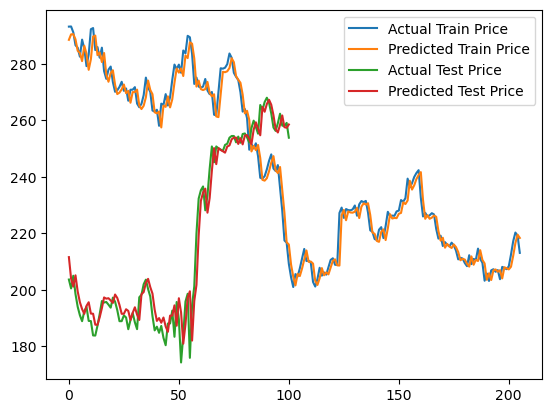

In [42]:
# Invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Visualize predictions with actual values
plt.plot(trainY.flatten(), label="Actual Train Price")
plt.plot(trainPredict.flatten(), label="Predicted Train Price")
plt.plot(testY.flatten(), label="Actual Test Price")
plt.plot(testPredict.flatten(), label="Predicted Test Price")
plt.legend()
plt.show()

In [43]:
# Calculate mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 3.97 RMSE
Test Score: 5.85 RMSE


In [44]:
def evaluate_decisions(actual_prices, predicted_prices):
    decisions = ['BUY' if predicted_prices[i] > actual_prices[i] else 'SELL' if predicted_prices[i] < actual_prices[i] else 'HOLD' for i in range(len(predicted_prices))]
    actual_movements = ['BUY' if actual_prices[i] > actual_prices[i-1] else 'SELL' if actual_prices[i] < actual_prices[i-1] else 'HOLD' for i in range(1, len(actual_prices))]
    
    # Initialize counts for correct decisions
    correct_buy = 0
    correct_sell = 0
    correct_hold = 0
    
    # Count correct decisions for each action
    for i in range(min(len(decisions), len(actual_movements))):
        if decisions[i] == actual_movements[i]:
            if decisions[i] == 'BUY':
                correct_buy += 1
            elif decisions[i] == 'SELL':
                correct_sell += 1
            else:
                correct_hold += 1
    
    return correct_buy, correct_sell, correct_hold


In [45]:
train_accuracy = evaluate_decisions(trainY.flatten(), trainPredict[:,0])
test_accuracy = evaluate_decisions(testY.flatten(), testPredict[:,0])

print("Train Accuracy (BUY, SELL, HOLD):", train_accuracy)
print("Test Accuracy (BUY, SELL, HOLD):", test_accuracy)



Train Accuracy (BUY, SELL, HOLD): (43, 66, 0)
Test Accuracy (BUY, SELL, HOLD): (26, 19, 0)
